In [19]:
import pandas as pd
from matplotlib import pyplot as plt

In [20]:
df = pd.read_csv('hitlist.csv')
df = df.set_index('number')

In [21]:
df.describe()


,hits,RMSD,x,y,z,alpha,beta,gamma
count,4096.000000,3982.000000,4096.000000,4096.000000,4096.000000,4.096000e+03,4.096000e+03,4.096000e+03
mean,40.901123,1.142774,0.000000,0.000000,0.000000,3.881444e-17,7.865887e-17,5.594483e-17
std,66.872271,0.022006,2.236341,2.236341,2.236341,3.727235e+00,3.727235e+00,3.727235e+00
min,0.000000,1.024757,-3.000000,-3.000000,-3.000000,-5.000000e+00,-5.000000e+00,-5.000000e+00
25%,8.750000,1.133581,-1.500000,-1.500000,-1.500000,-2.500000e+00,-2.500000e+00,-2.500000e+00
50%,21.000000,1.144756,0.000000,0.000000,0.000000,3.330669e-16,3.330669e-16,3.330669e-16
75%,46.000000,1.155381,1.500000,1.500000,1.500000,2.500000e+00,2.500000e+00,2.500000e+00
max,1202.000000,1.198500,3.000000,3.000000,3.000000,5.000000e+00,5.000000e+00,5.000000e+00


In [75]:
print ('%s quantile for hits is: %d. With %s members in this group.'%(0.9, df.hits.quantile(0.9),len(df.query('hits > %d' %(df.hits.quantile(0.9)))) ))
print ('%s quantile for hits is: %d. With %s members in this group.'%(0.95, df.hits.quantile(0.95),len(df.query('hits > %d' %(df.hits.quantile(0.95)))) ))
print ('%s quantile for hits is: %d. With %s members in this group.'%(0.99, df.hits.quantile(0.99),len(df.query('hits > %d' %(df.hits.quantile(0.99))))))
print ('%s quantile for hits is: %d. With %s members in this group.'%(0.999, df.hits.quantile(0.999),len(df.query('hits > %d' %(df.hits.quantile(0.999))))))

0.9 quantile for hits is: 96. With 408 members in this group.
0.95 quantile for hits is: 152. With 203 members in this group.
0.99 quantile for hits is: 277. With 41 members in this group.
0.999 quantile for hits is: 784. With 5 members in this group.


In [82]:
list(df.query('hits > %d' %(df.hits.quantile(0.99))).index)

[1062,
 1280,
 1043,
 1093,
 1056,
 1032,
 1030,
 1049,
 2048,
 1072,
 1034,
 1042,
 1076,
 1026,
 1089,
 1045,
 1040,
 1028,
 1284,
 1031,
 1061,
 1024,
 1074,
 1088,
 1058,
 1048,
 1025,
 1046,
 1090,
 1044,
 1029,
 1027,
 1060,
 1092,
 1073,
 1104,
 1033,
 1057,
 1041,
 1296,
 1281]

In [115]:
df['gamma'].value_counts()

 1.666667    1024
-1.666667    1024
 5.000000    1024
-5.000000    1024
Name: gamma, dtype: int64

In [90]:
#best = df.loc[df['hits'].nlargest(30).index,:] # This works by taking the 30 best.
best = df.query('hits > %d' %(df.hits.quantile(0.99)))# This works by taking the best 1% with regards to hits.
best.describe()


,hits,RMSD,x,y,z,alpha,beta,gamma
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,486.000000,1.144708,-0.951220,-2.804878,-2.707317,-2.154472,-3.048780,-1.829268
std,225.505432,0.004246,0.312348,0.600812,0.715678,3.379758,2.354146,3.244758
min,278.000000,1.135491,-1.000000,-3.000000,-3.000000,-5.000000,-5.000000,-5.000000
25%,322.000000,1.141130,-1.000000,-3.000000,-3.000000,-5.000000,-5.000000,-5.000000
50%,392.000000,1.144787,-1.000000,-3.000000,-3.000000,-1.666667,-5.000000,-1.666667
75%,546.000000,1.147503,-1.000000,-3.000000,-3.000000,-1.666667,-1.666667,1.666667
max,1202.000000,1.156764,1.000000,-1.000000,-1.000000,5.000000,1.666667,5.000000


In [91]:
for c in list(best.columns[2:]): print (best[c].value_counts())

-1.0    40
 1.0     1
Name: x, dtype: int64
-3.0    37
-1.0     4
Name: y, dtype: int64
-3.0    35
-1.0     6
Name: z, dtype: int64
-5.000000    20
-1.666667    11
 1.666667     6
 5.000000     4
Name: alpha, dtype: int64
-5.000000    22
-1.666667    14
 1.666667     5
Name: beta, dtype: int64
-5.000000    17
-1.666667    12
 1.666667     9
 5.000000     3
Name: gamma, dtype: int64


In [92]:
best.style.background_gradient()

,hits,RMSD,x,y,z,alpha,beta,gamma
number,,,,,,,,
1062,291,1.1446,-1,-3,-3,1.66667,-1.66667,1.66667
1280,304,1.15076,-1,-1,-3,-5,-5,-5
1043,319,1.13549,-1,-3,-3,-1.66667,-5,5
1093,278,1.14604,-1,-3,-1,-5,-1.66667,-1.66667
1056,725,1.14479,-1,-3,-3,1.66667,-5,-5
1032,467,1.14294,-1,-3,-3,-5,1.66667,-5
1030,549,1.14702,-1,-3,-3,-5,-1.66667,1.66667
1049,322,1.14951,-1,-3,-3,-1.66667,1.66667,-1.66667
2048,344,1.14508,1,-3,-3,-5,-5,-5


In [46]:
worst = df.loc[df['hits'].nsmallest(500).index,:]
worst.describe()

,hits,RMSD,x,y,z,alpha,beta,gamma
count,500.000000,386.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,2.318000,1.154545,0.548000,0.592000,0.236000,0.740000,0.100000,-0.520000
std,1.724768,0.029282,2.306151,2.447349,2.468297,3.668391,3.668974,3.830150
min,0.000000,1.065727,-3.000000,-3.000000,-3.000000,-5.000000,-5.000000,-5.000000
25%,1.000000,1.133875,-1.000000,-3.000000,-3.000000,-1.666667,-1.666667,-5.000000
50%,2.000000,1.160888,1.000000,1.000000,1.000000,1.666667,1.666667,-1.666667
75%,4.000000,1.177733,3.000000,3.000000,3.000000,5.000000,5.000000,1.666667
max,5.000000,1.198500,3.000000,3.000000,3.000000,5.000000,5.000000,5.000000


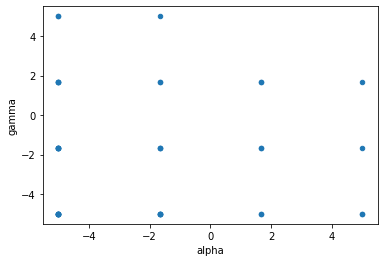

In [93]:
best.plot('alpha','gamma', kind='scatter')

In [48]:
df.plot('alpha','gamma',kind='scatter','hits')

SyntaxError: positional argument follows keyword argument (<ipython-input-48-4a2ccc0e3bee>, line 1)

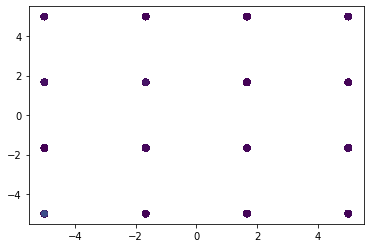

In [49]:
plt.scatter(df['alpha'],df['beta'],c=df['hits'])

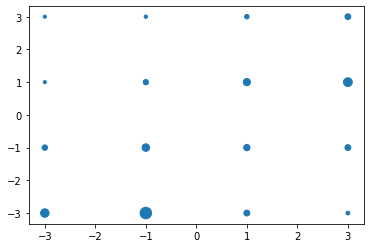

In [63]:
groupeddf = df.groupby(['x','y']).hits.mean()
plt.scatter(groupeddf.index.get_level_values(0),groupeddf.index.get_level_values(1),groupeddf)

Text(0, 0.5, 'y [A]')

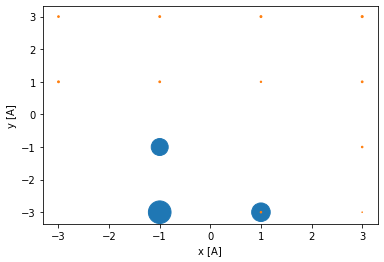

In [186]:
groupeddf = best.groupby(['x','y']).hits.mean()
plt.scatter(groupeddf.index.get_level_values(0),groupeddf.index.get_level_values(1),groupeddf)
wgroupeddf = worst.groupby(['x','y']).hits.mean()
plt.scatter(wgroupeddf.index.get_level_values(0),wgroupeddf.index.get_level_values(1),wgroupeddf)
plt.xlabel('x [A]')
plt.ylabel('y [A]')

Showing z on x-axis, alpha on y-axis.


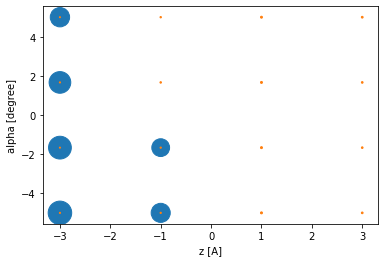

In [184]:
groupeddf = best.groupby(['z','alpha']).hits.mean()
plt.scatter(groupeddf.index.get_level_values(0),groupeddf.index.get_level_values(1),groupeddf)
wgroupeddf = worst.groupby(['z','alpha']).hits.mean()
plt.scatter(wgroupeddf.index.get_level_values(0),wgroupeddf.index.get_level_values(1),wgroupeddf)
plt.xlabel('z [A]')
plt.ylabel('alpha [degree]')

Text(0, 0.5, 'gamma [degree]')

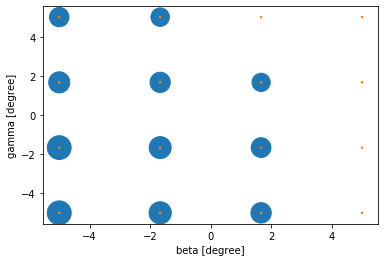

In [187]:
groupeddf = best.groupby(['beta','gamma']).hits.mean()
plt.scatter(groupeddf.index.get_level_values(0),groupeddf.index.get_level_values(1),groupeddf)
wgroupeddf = worst.groupby(['beta','gamma']).hits.mean()
plt.scatter(wgroupeddf.index.get_level_values(0),wgroupeddf.index.get_level_values(1),wgroupeddf)
plt.xlabel('beta [degree]')
plt.ylabel('gamma [degree]')

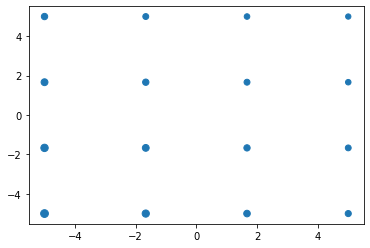

In [97]:
groupeddf = df.groupby(['alpha','beta']).hits.mean()
plt.scatter(groupeddf.index.get_level_values(0),groupeddf.index.get_level_values(1),groupeddf)

In [35]:
df.loc[df['hits'].nlargest(50).index,:].x.value_counts()

-1.0    34
-3.0     8
 1.0     8
Name: x, dtype: int64

In [26]:
df.loc[df['hits'].nsmallest(20).index,:].x.value_counts()

 3.0    17
-1.0     2
-3.0     1
Name: x, dtype: int64

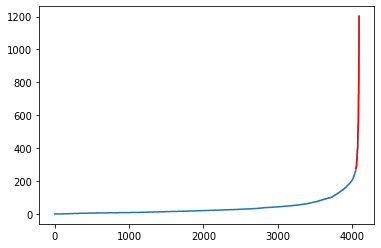

In [112]:
plt.plot(range(0,len(df)),df.hits.sort_values())
plt.plot(range(len(df)-len(best),len(df)),best.hits.sort_values(), color ='red')

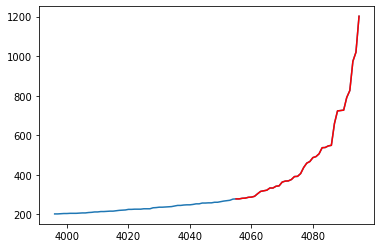

In [113]:
plt.plot(range(3996,len(df)),df.hits.sort_values().iloc[3996:])
plt.plot(range(len(df)-len(best),len(df)),best.hits.sort_values(), color ='red')

In [87]:
df.loc[2732]

hits     4.000000
RMSD     1.184950
x        1.000000
y        1.000000
z        1.000000
alpha    1.666667
beta     5.000000
gamma   -5.000000
Name: 2732, dtype: float64

In [107]:
lowangle = best.query('2> alpha > -2 & 2> beta > -2 & 2> gamma > -2')

In [108]:
lowangle

,hits,RMSD,x,y,z,alpha,beta,gamma
number,,,,,,,,
1062,291,1.144602,-1.0,-3.0,-3.0,1.666667,-1.666667,1.666667
1049,322,1.149506,-1.0,-3.0,-3.0,-1.666667,1.666667,-1.666667
1045,546,1.147615,-1.0,-3.0,-3.0,-1.666667,-1.666667,-1.666667
1061,376,1.145845,-1.0,-3.0,-3.0,1.666667,-1.666667,-1.666667
1046,391,1.143815,-1.0,-3.0,-3.0,-1.666667,-1.666667,1.666667


In [122]:
thirteenth = pd.read_csv('hitlist_13th.csv')
thirteenth = thirteenth.set_index('number')

In [123]:
thirteenth.describe()

,hits,RMSD,x,y,z,alpha,beta,gamma
count,4096.000000,3941.000000,4096.000000,4096.000000,4096.000000,4.096000e+03,4.096000e+03,4.096000e+03
mean,35.535156,1.144055,0.000000,0.000000,0.000000,3.881444e-17,7.865887e-17,5.594483e-17
std,62.242927,0.025308,2.236341,2.236341,2.236341,3.727235e+00,3.727235e+00,3.727235e+00
min,0.000000,0.926420,-3.000000,-3.000000,-3.000000,-5.000000e+00,-5.000000e+00,-5.000000e+00
25%,7.000000,1.132434,-1.500000,-1.500000,-1.500000,-2.500000e+00,-2.500000e+00,-2.500000e+00
50%,21.000000,1.146405,0.000000,0.000000,0.000000,3.330669e-16,3.330669e-16,3.330669e-16
75%,41.000000,1.159283,1.500000,1.500000,1.500000,2.500000e+00,2.500000e+00,2.500000e+00
max,1098.000000,1.200000,3.000000,3.000000,3.000000,5.000000e+00,5.000000e+00,5.000000e+00


In [124]:
print ('%s quantile for hits is: %d. With %s members in this group.'%(0.9, thirteenth.hits.quantile(0.9),len(thirteenth.query('hits > %d' %(thirteenth.hits.quantile(0.9)))) ))
print ('%s quantile for hits is: %d. With %s members in this group.'%(0.95, thirteenth.hits.quantile(0.95),len(thirteenth.query('hits > %d' %(thirteenth.hits.quantile(0.95)))) ))
print ('%s quantile for hits is: %d. With %s members in this group.'%(0.99, thirteenth.hits.quantile(0.99),len(thirteenth.query('hits > %d' %(thirteenth.hits.quantile(0.99))))))
print ('%s quantile for hits is: %d. With %s members in this group.'%(0.999, thirteenth.hits.quantile(0.999),len(thirteenth.query('hits > %d' %(thirteenth.hits.quantile(0.999))))))

0.9 quantile for hits is: 76. With 410 members in this group.
0.95 quantile for hits is: 110. With 205 members in this group.
0.99 quantile for hits is: 261. With 41 members in this group.
0.999 quantile for hits is: 769. With 5 members in this group.


In [125]:
print ('%s quantile for hits is: %d. With %s members in this group.'%(0.9, df.hits.quantile(0.9),len(df.query('hits > %d' %(df.hits.quantile(0.9)))) ))
print ('%s quantile for hits is: %d. With %s members in this group.'%(0.95, df.hits.quantile(0.95),len(df.query('hits > %d' %(df.hits.quantile(0.95)))) ))
print ('%s quantile for hits is: %d. With %s members in this group.'%(0.99, df.hits.quantile(0.99),len(df.query('hits > %d' %(df.hits.quantile(0.99))))))
print ('%s quantile for hits is: %d. With %s members in this group.'%(0.999, df.hits.quantile(0.999),len(df.query('hits > %d' %(df.hits.quantile(0.999))))))

0.9 quantile for hits is: 96. With 408 members in this group.
0.95 quantile for hits is: 152. With 203 members in this group.
0.99 quantile for hits is: 277. With 41 members in this group.
0.999 quantile for hits is: 784. With 5 members in this group.


In [128]:
print (df.loc[3674])
print (thirteenth.loc[3674])

hits     147.000000
RMSD       1.135565
x          3.000000
y          1.000000
z         -1.000000
alpha     -1.666667
beta       1.666667
gamma      1.666667
Name: 3674, dtype: float64
hits     72.000000
RMSD      1.143686
x         3.000000
y         1.000000
z        -1.000000
alpha    -1.666667
beta      1.666667
gamma     1.666667
Name: 3674, dtype: float64


In [129]:
df13_copy = thirteenth.copy()

In [140]:
df13_copy= df13_copy.rename(columns={'hits':'hits13', 'RMSD':'RMSD13', 'x':'x13', 'y':'y13', 'z':'z13', 'alpha':'alpha13', 'beta':'beta13','gamma': 'gamma13'})

In [141]:
df13_copy

,hits13,RMSD13,x13,y13,z13,alpha13,beta13,gamma13
number,,,,,,,,
1506,22,1.146045,-1.0,-1.0,3.0,1.666667,-5.000000,1.666667
1806,18,1.152211,-1.0,3.0,-3.0,-5.000000,5.000000,1.666667
1905,15,1.130167,-1.0,3.0,-1.0,5.000000,-5.000000,-1.666667
3784,4,1.171400,3.0,1.0,3.0,-5.000000,1.666667,-5.000000
1294,119,1.149717,-1.0,-1.0,-3.0,-5.000000,5.000000,1.666667
...,...,...,...,...,...,...,...,...
2745,11,1.157282,1.0,1.0,1.0,5.000000,1.666667,-1.666667
2971,2,1.165000,1.0,3.0,1.0,-1.666667,1.666667,5.000000
622,1,1.194800,-3.0,1.0,-1.0,1.666667,5.000000,1.666667


In [142]:
bothdf = pd.concat([df,df13_copy], axis=1)

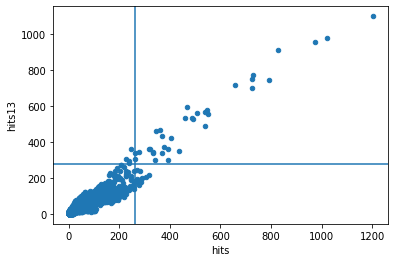

In [180]:
bothdf.plot('hits','hits13',kind='scatter')
plt.axvline(x=261)
plt.axhline(y=277)

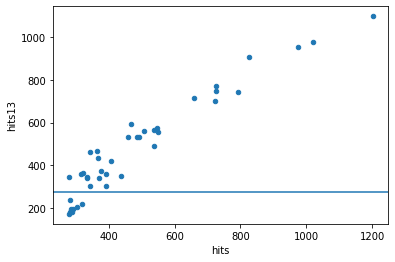

In [181]:
bothdf.query('hits> %d' %(bothdf.hits.quantile(0.99))).plot('hits','hits13',kind='scatter')
plt.axhline(y=277)

In [172]:
best_hits = bothdf.query('hits> %d' %(bothdf.hits.quantile(0.99)))
best_hits13 = bothdf.query('hits13> %d' %(bothdf.hits13.quantile(0.99)))

In [174]:
for item in list(best_hits.index):
    if not item in list(best_hits13.index):
        print (item)

1062
1280
1043
1284
1074
1090
1296
1281


In [167]:
best_hits13.index

Int64Index([1093, 1056, 1032, 1030, 1049, 2048, 1072, 1034, 1036, 1042, 1076,
            1026, 2064, 1089, 1045, 1040, 1028, 1031, 1061, 1024, 1088, 1058,
            1048, 1025, 1046, 2052, 1064, 1044, 1029, 1027, 1060, 1092, 1096,
            1073, 1104, 1033, 1057, 1041, 1108],
           dtype='int64', name='number')

In [194]:
low_trans = bothdf.query('1.1> x >-1.1 & 1.1> y >-1.1 & 1.1> z >-1.1')

In [196]:
low_trans.describe()

,hits,RMSD,x,y,z,alpha,beta,gamma,hits13,RMSD13,x13,y13,z13,alpha13,beta13,gamma13
count,512.000000,512.000000,512.000000,512.000000,512.000000,5.120000e+02,5.120000e+02,5.120000e+02,512.000000,512.000000,512.000000,512.000000,512.000000,5.120000e+02,5.120000e+02,5.120000e+02
mean,29.412109,1.148024,0.000000,0.000000,0.000000,6.245005e-17,1.838807e-16,1.504873e-16,25.328125,1.149037,0.000000,0.000000,0.000000,6.245005e-17,1.838807e-16,1.504873e-16
std,20.901598,0.014689,1.000978,1.000978,1.000978,3.730425e+00,3.730425e+00,3.730425e+00,19.468720,0.016619,1.000978,1.000978,1.000978,3.730425e+00,3.730425e+00,3.730425e+00
min,2.000000,1.095286,-1.000000,-1.000000,-1.000000,-5.000000e+00,-5.000000e+00,-5.000000e+00,1.000000,1.091883,-1.000000,-1.000000,-1.000000,-5.000000e+00,-5.000000e+00,-5.000000e+00
25%,13.000000,1.139134,-1.000000,-1.000000,-1.000000,-2.500000e+00,-2.500000e+00,-2.500000e+00,11.000000,1.139663,-1.000000,-1.000000,-1.000000,-2.500000e+00,-2.500000e+00,-2.500000e+00
50%,23.500000,1.147045,0.000000,0.000000,0.000000,3.330669e-16,3.330669e-16,3.330669e-16,19.000000,1.150609,0.000000,0.000000,0.000000,3.330669e-16,3.330669e-16,3.330669e-16
75%,43.000000,1.156799,1.000000,1.000000,1.000000,2.500000e+00,2.500000e+00,2.500000e+00,35.000000,1.161020,1.000000,1.000000,1.000000,2.500000e+00,2.500000e+00,2.500000e+00
max,109.000000,1.188067,1.000000,1.000000,1.000000,5.000000e+00,5.000000e+00,5.000000e+00,107.000000,1.184020,1.000000,1.000000,1.000000,5.000000e+00,5.000000e+00,5.000000e+00
